Jason Cain, Nathan Harms, Marissa Puzan
## Serotonin transport modeling 


Laminar flow model:

## $$ \frac{C_m}{C_o} = \sum_{n} M_n e^{- \beta^2 Gz} $$



from
$$v_z \frac{\partial C}{\partial z} = D \frac{1}{r} \frac{\partial}{\partial r} \left( r \frac{\partial C}{\partial r} \right)$$
where 

$$ Gz = \frac{D L}{V_m R^2} $$

$$ P_w^* = P_w \left( \frac{R}{D} \right) $$

$$ M_n = f( P_w^* ) $$ 

$$ \beta = f( P_w^* ) $$ 

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from collections import namedtuple

In [2]:
import new


In [3]:

ConditionSet = namedtuple('ConditionSet', ['Concentration', 'Diffusivity', 'Permeability'])
KineticsParamers = namedtuple('ConditionSet', ['vmax1', 'Km1', 'K1', 'vmax2', 'Km2', 'K2'])


serCondition = ConditionSet(
                Concentration = 2,
                Diffusivity = 6.2424e-8,
                Permeability =7.576e-13)

trypCondition = ConditionSet(
                Concentration = .1,
                Diffusivity = 5.386e-8,
                Permeability = 6.44e-4)

htpCondition = ConditionSet(
                Concentration = 0,
                Diffusivity = 4.995e-8,
                Permeability = 7.576e-13)

kinetics = KineticsParamers(vmax1 = 0.1868167,
                            Km1 = 1.43533284,
                            K1 = 0.43680929,
                            vmax2 = 9.97704964,
                            Km2 = 2.37430847,
                            K2 = 0.25340153)

wallKinetics = KineticsParamers(vmax1 = 7.56e-14,
                            Km1 = 0.6e-3,
                            K1 = 1,
                            vmax2 = 7.14,
                            Km2 = 119,
                            K2 = 1)

# kinetics = KineticsParamers(vmax1 = 0,
#                             Km1 = 1,
#                             K1 = 1,
#                             vmax2 = 0,
#                             Km2 = 1,
#                             K2 = 1)

# wallKinetics = KineticsParamers(vmax1 = 0,
#                             Km1 = 1,
#                             K1 = 1,
#                             vmax2 = 0,
#                             Km2 = 1,
#                             K2 = 1)

radius = 2.5/2/100
length = 7.5
max_velocity = .0287/60
timestep = 60/3600
rings = 20
sections = 500

Model = new.LaminarFlow(length, radius, max_velocity, trypCondition, htpCondition, serCondition, kinetics, wallKinetics, rings, sections, timestep)

Times array is 1568
[ 0.1  0.   0.  ...,  0.   0.   0. ]
[  9.99999784e-02   5.26617612e-06   0.00000000e+00 ...,   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[  9.99999784e-02   5.26562025e-06   2.77326109e-10 ...,   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[  9.99999568e-02   1.05312406e-05   5.54535246e-10 ...,   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[  9.99999568e-02   1.05306848e-05   8.31802890e-10 ...,   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[  9.99993049e-02   1.69252010e-04   1.43938503e-07 ...,   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[  9.99993049e-02   1.69252514e-04   1.43536150e-07 ...,   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[  9.99986541e-02   3.27468697e-04   5.38169834e-07 ...,   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[  9.99986541e-02   3.27469703e-04   5.37367357e-07 ...,   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
[  9.99980044e-02   4.85183250e-04   1.18152847e-06 ...,   0.00

/Users/Cain/anaconda2/envs/py3/lib/python3.5/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [4]:
results = Model.results.reshape(-1,3,rings,sections)

print(results.shape)

serotonin = results[:,2,:,:]
tryptophan = results[:,0,:,:]
htp = results[:,1,:,:]



(1568, 3, 20, 500)


In [12]:
print(len(Model.serotoninUptake))
serotoninUptake = np.array(Model.serotoninUptake)

1018


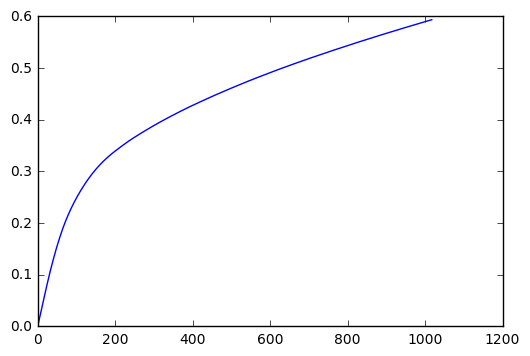

In [6]:
plt.plot(serotoninUptake)

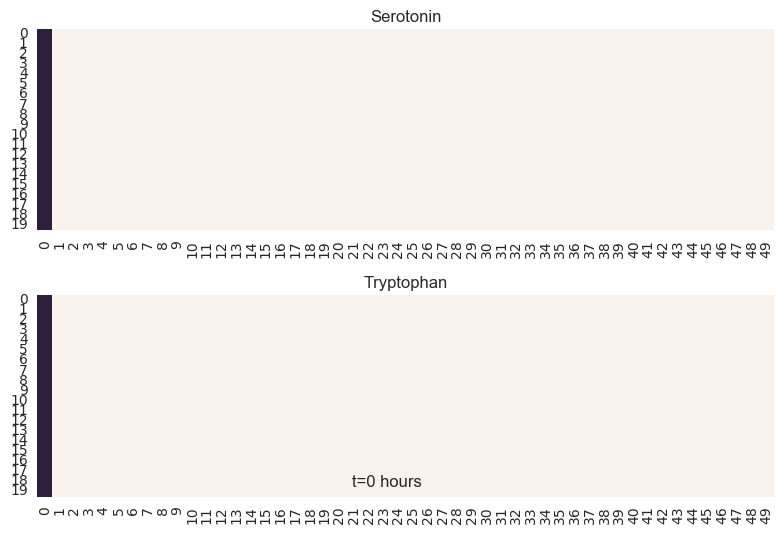

In [11]:
from matplotlib import animation
import matplotlib
import seaborn as sns


matplotlib.rc('animation', html='html5')
fig = plt.figure()
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
timestamp = fig.text(0.45,0.1,'timestamp')
frames = 100
def animate(i):
    step = i * len(serotonin[:,0,0])//(frames)
    serotonin_g = serotonin[i,:,:50]
    tryp_g = tryptophan[i,:,:50]
    sns.heatmap(serotonin_g, vmin=0,vmax=1e-8, ax=ax1, cbar = None)
    ax1.set_title('Serotonin')
    sns.heatmap(tryp_g, vmin=0,vmax=1e-8, ax=ax2, cbar=None)
    ax2.set_title('Tryptophan')
    timestamp.set_text('t={0:.0f} hours'.format(Model.times[i]/3600))
    plt.tight_layout()
    
anim = animation.FuncAnimation(fig, animate, frames=frames, repeat_delay=2000, repeat=True)
anim

In [8]:
from SALib.sample.saltelli import sample as ss
from SALib.analyze.sobol import analyze as sa


In [9]:
def laminarModel(data):
    trypCondition = ConditionSet(
                Concentration = data[3],
                Diffusivity = data[4],
                Permeability = data[5])

    htpCondition = ConditionSet(
                Concentration = data[6],
                Diffusivity = data[7],
                Permeability = data[8])

    serCondition = ConditionSet(
                Concentration = data[9],
                Diffusivity = data[10],
                Permeability = data[11])
    
    kinetics = KineticsParamers(vmax1 = data[12],
                            Km1 = data[13],
                            K1 = data[14],
                            vmax2 = data[15],
                            Km2 = data[16],
                            K2 = data[17])
    
    wallKinetics = KineticsParamers(vmax1 = data[18],
                            Km1 = data[19],
                            K1 = data[20],
                            vmax2 = data[21],
                            Km2 = data[22],
                            K2 = data[23])
    
    rings = 20
    sections = 500
    
    Model = laminarFlow.LaminarFlow(data[0],data[1],data[2],
                                    trypCondition, htpCondition, serCondition, 
                                    kinetics, wallKinetics, 
                                    rings, sections)

In [10]:


# morris_problem = {
#     # There are six variables
#     'num_vars': 23,
#     # These are their names
#     'names': ['length', 'radius', 'max_velocity', 'serConc', 'serDiff', 
#               'serPerm', 'tryConc', 'tryDiff', 'tryPerm','vmax1', 'Km1', 'K1', 'vmax2', 'Km2', 'K2'],
#     # These are their plausible ranges over which we'll move the variables
#     'bounds': [[,], # length (m)
#                [,], # radius (m)
#                [,], # max_velocity (m/s)
#                [,], # Tryptophan Concentration
#                [,], # Tryptophan Diffusivity
#                [,], # Tryptophan Wall Permabilityhttp://localhost:8888/notebooks/SerotoninTransportModel.ipynb#
#                [,], # 5HTP Concentration
#                [,], # 5HTP Diffusivity
#                [,], # 5HTP Wall Permability
#                [,], # Serotonin Concentration (mM)
#                [,], # Serotonin Diffusivity 
#                [,], # Serotonin Wall Permeability 
#                [,], # Max rate of Tryp -> 5HTP
#                [,], # Michaelus Menton Constant Tryp -> 5HTP
#                [,], # Equilibrium Constant for 5HTP and Tryp
#                [,], # Max rate of 5HTP -> Serotonin
#                [,], # Michaelus Menton Constant 5HTP -> Serotonin
#                [,], # Equilibrium Constant for 5HTP and Serotonin
#                [,], # Max wall rate of Tryp -> 5HTP
#                [,], # Michaelus Menton Constant @ wall Tryp -> 5HTP
#                [,], # Equilibrium Constant for 5HTP and Tryp @ wall
#                [,], # Max rate of 5HTP -> Serotonin @ wall
#                [,], # Michaelus Menton Constant 5HTP -> Serotonin @ wall
#                [,], # Equilibrium Constant for 5HTP and Serotonin @ wall

#               ],
#     # I don't want to group any of these variables together
#     'groups': None
#     }